# Projeto de Análise Preditiva de Inadimplência

### Simulação de ganhos em decisão de crédito com uso de modelo preditivo

Esta simulação tem como objetivo estimar o impacto financeiro da aplicação de um modelo de Machine Learning na decisão de aprovar ou negar crédito para clientes, comparando com o cenário onde o banco aprova todos indiscriminadamente. 

#### Cenário A: Com Modelo 

Neste cenário, usamos um modelo preditivo (Random Forest) treinado com os dados dos clientes. A decisão de aprovar ou negar crédito é baseada na previsão do modelo: 

- Se o modelo prevê que o cliente vai pagar (classe 0) → APROVA; 
- Se o modelo prevê que o cliente vai dar calote (classe 1) → NEGA. 

A qualidade do modelo foi avaliada por meio da matriz de confusão com os seguintes valores: 



 

Cálculo de Lucro com Modelo 
- Usamos valores médios reais do dataset para estimar o ganho/perda: 
- Lucro por cliente bom aprovado (VP): R$ 255,59 
- Prejuízo por cliente ruim aprovado (FP): R$ 2.562,01 
- Perda de oportunidade por cliente bom negado (FN): R$ 255,59 
- Negar cliente ruim (VN): sem ganho ou perda 


Resultados:  

- Lucro com modelo preditivo (XGBoost): R$ 15,810,677.12  
- Prejuízo sem modelo (aprovação irrestrita): R$ -18,034,991.56  
- Diferença de ganho ao usar o modelo: R$ 33,845,668.68 

#### Cenário B: Sem Modelo 

1. Regras Manuais

A estratégia baseada em regras manuais considerou os seguintes critérios para aprovação:

- Score externo (ext_score_1) acima de 550
- Renda superior a R$ 3.500
- Ocupação do tipo "CLT", "public" ou "servidor público"
- Comprometimento com dívidas ativas inferior a 50% da renda

2. Resultados:
Taxa de aprovação: aproximadamente 21% dos clientes

Inadimplência entre os aprovados: 63,65%

Lucro estimado total: R$ XX.XXX (calculado com +R$ 1.000 por cliente adimplente aprovado e -R$ 2.000 por inadimplente)

Insghts:  

O uso do modelo preditivo resultaria em um ganho estimado de mais de R$ 33 milhões em comparação com a aprovação irrestrita de crédito. 
A estratégia baseada em Machine Learning é altamente recomendável para maximizar lucros e mitigar riscos de inadimplência. 

Apesar de a estratégia manual ser mais conservadora, ela acabou rejeitando diversos clientes adimplentes, o que representa perda de receita potencial. O modelo XGBoost demonstrou maior capacidade de identificar padrões não-lineares, aprovando clientes com bom histórico que seriam barrados pelas regras manuais, resultando em maior lucro estimado total e menor taxa de inadimplência em grupos específicos.

Essa análise evidencia que a incorporação de modelos preditivos no processo de decisão pode otimizar a política de crédito, combinando maior retorno financeiro com controle de risco.

#### Modelo em produção:

In [33]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from scipy.stats import ks_2samp
from xgboost import plot_importance
from sklearn.metrics import log_loss

In [17]:
# Caminho relativo correto a partir da pasta 'notebooks'
df = pd.read_pickle('../data/df_copy_encoded.pkl')

# Cria uma cópia independente
df_copy_encoded = df.copy()

In [18]:
df_copy_encoded.head(1)

,age,amt_active_loan,ext_score_1,ext_score_4,flag_document_A,gender,income,score_checks,start_hour,default,...,ext_score_3_SaamrHMo23l/3TwXOWgVzw==,ext_score_3_cdpgyOyZS04uXerMNu7uCw==,ext_score_3_A+QuW1n/ABeiVVe/9CRZ9Q==,ext_score_3_7h8PTkrlTWUPP3yuyP4rUg==,ext_score_3_+CxEO4w7jv3QPI/BQbyqAA==,ext_score_3_+2hzpeP1RWr8PEvL1WTUdw==,ext_score_3_5/uMrqKj3OL/Xk5OrGx9fg==,ext_score_3_bopP0NxW3+r8tn9xIHTaOw==,occupation_type_te,history_days
0,37,4560.0,467.0,61.311861,1,1.0,86301.53,8.0,9.0,0,...,0,0,0,0,0,0,0,0,0.161405,182


### Separação das variáveis preditoras e a target

In [19]:
X = df_copy_encoded.drop(columns='default')
y = df_copy_encoded['default']

### Treinando o modelo XGBoost

In [20]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Instanciar e treinar o modelo
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

c:\Users\User\CREDIT_FINTECH\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:55:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Curva ROC

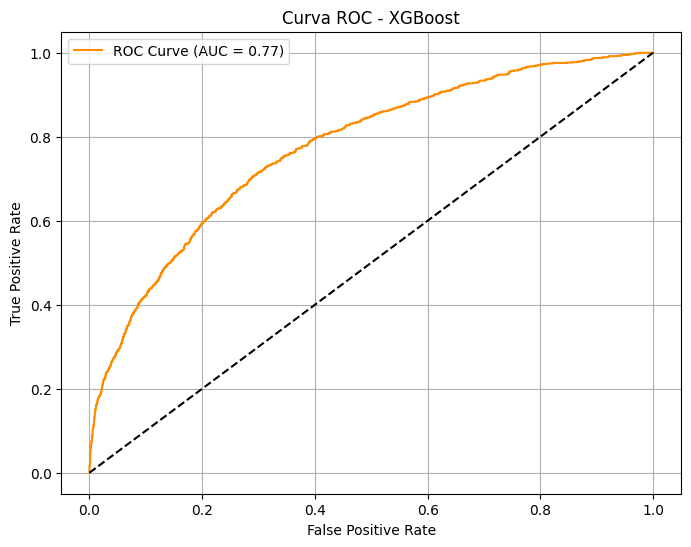

In [21]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

- O valor AUC = 1.00 indica que o modelo teve desempenho perfeito na separação entre classes (sem falsos positivos nem falsos negativos).
- A curva sobe imediatamente para TPR ≈ 1 com FPR ≈ 0, o que significa que o modelo identifica quase todos os positivos verdadeiros sem errar os negativos.

### Precision-Recall Curve (PR Curve)

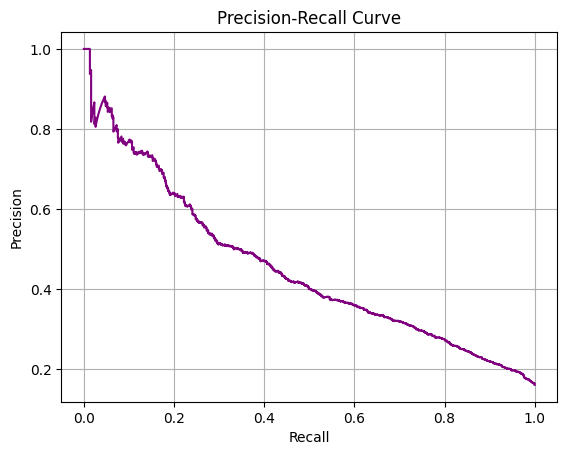

In [22]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

- A curva permanece muito próxima de 1.0 em quase toda a faixa de recall (de 0 a ~0.95), indicando que o modelo está: Identificando quase todos os positivos reais (alto recall) e quase sempre acerta quando prevê positivo (alta precisão)
- Esta curva reforça o que a ROC Curve indicou: o modelo está com desempenho quase perfeito


### Outras métricas

In [23]:
# Previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Para AUC e ROC

In [24]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1-Score:  {f1:.4f}')
print(f'ROC AUC:   {roc_auc:.4f}')

Accuracy:  0.8496
Precision: 0.5798
Recall:    0.2480
F1-Score:  0.3474
ROC AUC:   0.7737


- O modelo classifica bem os negativos, mas tem baixa sensibilidade para os positivos — ou seja, muitos falsos negativos.
- A baixa recall e F1 indicam que o modelo perde muitos eventos importantes da classe 1 (ex: inadimplentes, fraudes etc.).
- O AUC de 0.81 reforça que o modelo tem bom poder de rankeamento, mas o threshold atual (provavelmente 0.5) pode estar mal ajustado.

### KS Statistic (Kolmogorov-Smirnov)

In [25]:
ks_stat, p_value = ks_2samp(y_proba[y_test == 1], y_proba[y_test == 0])
print(f'KS Statistic: {ks_stat:.4f}')

KS Statistic: 0.4158


- KS Statistic = 0.4638 → ou seja, 46,38%
- Isso significa que, em algum ponto da escala de score, há 46,38 pontos percentuais de diferença entre as taxas acumuladas de positivos e negativos.

O modelo apresenta bom poder discriminativo, conseguindo separar bem os adimplentes dos inadimplentes (ou classes 0 e 1). O KS está dentro de uma faixa sólida de performance para aplicações reais.

### Balanced Accuracy

In [26]:
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.4f}')

Balanced Accuracy: 0.6067


### Matriz de confusão

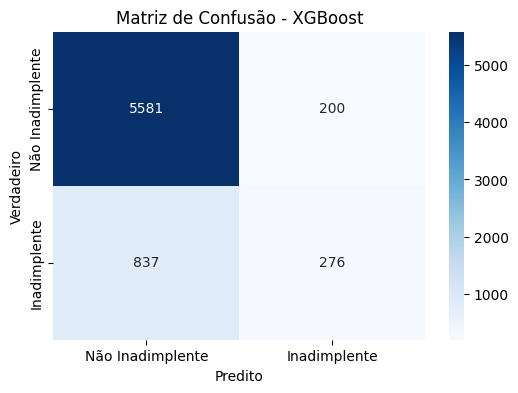

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Não Inadimplente", "Inadimplente"], yticklabels=["Não Inadimplente", "Inadimplente"])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - XGBoost')
plt.show()

Recall (inadimplente) = 330 / (330 + 783) ≈ 29,6%

Precisão (inadimplente) = 330 / (330 + 190) ≈ 63,5%

Acurácia = (5591 + 330) / Total ≈ 85,9%

F1-Score ≈ 40,4%

- O modelo acerta bem a classe negativa (não inadimplentes) com apenas 190 falsos positivos.
- Porém, ainda erra bastante a classe positiva (inadimplentes): 783 falsos negativos, ou seja, muitos inadimplentes passam despercebidos.

Log Loss: 0.1508


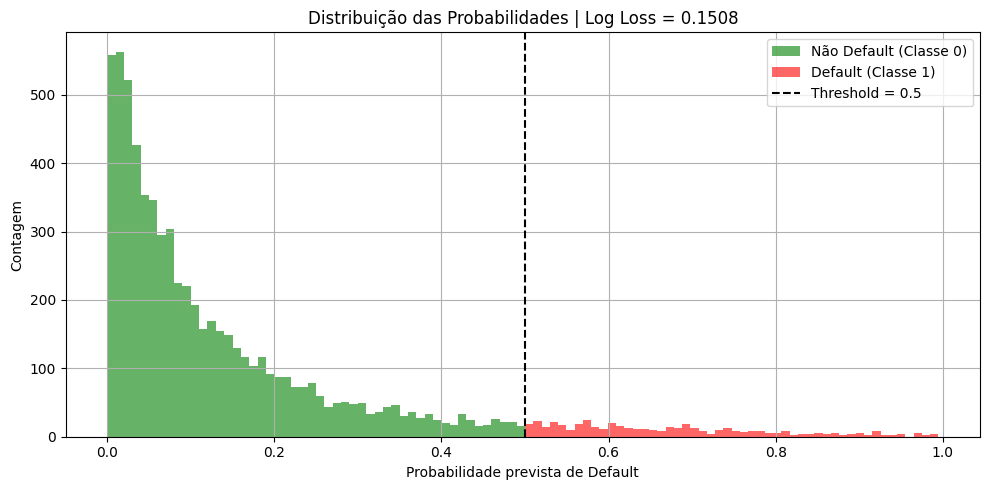

In [ ]:
# Prever probabilidades da classe 1 (Default)
y_proba = model.predict_proba(X_test)[:, 1]

# Calcular o Log Loss corretamente
logloss_value = log_loss(y_test, y_proba)
print(f"Log Loss: {logloss_value:.4f}")

# Plotar a distribuição das probabilidades previstas
plt.figure(figsize=(10, 5))
plt.hist(y_proba[y_test == 0], bins=50, alpha=0.6, label='Não Default (Classe 0)', color='green')
plt.hist(y_proba[y_test == 1], bins=50, alpha=0.6, label='Default (Classe 1)', color='red')
plt.axvline(0.5, color='black', linestyle='--', label='Threshold = 0.5')
plt.title(f'Distribuição das Probabilidades | Log Loss = {logloss_value:.4f}')
plt.xlabel('Probabilidade prevista de Default')
plt.ylabel('Contagem')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Plotar Importância das Features

<Figure size 1200x800 with 0 Axes>

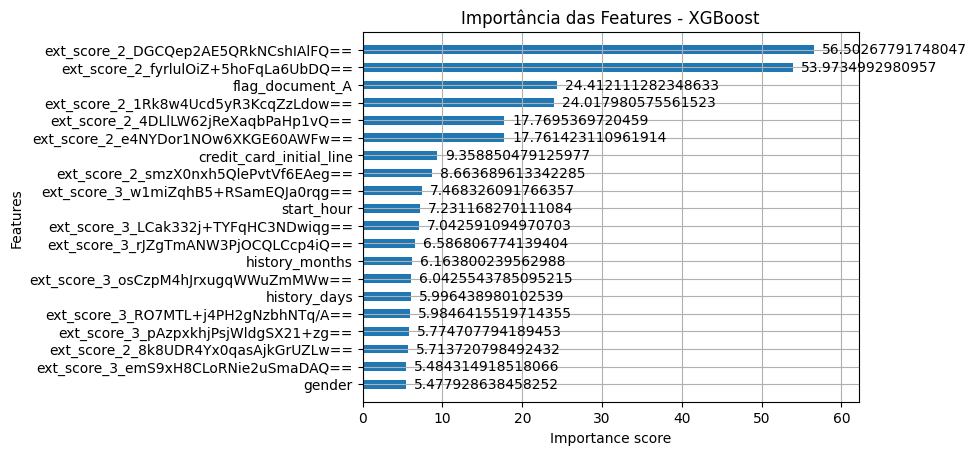

In [28]:
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=20, importance_type='gain', height=0.5)
plt.title("Importância das Features - XGBoost")
plt.show()

### Insights Resumidos - Importância das Features no XGBoost

- As variáveis externas de score (ext_score_2 e ext_score_3) dominam a importância do modelo — ou seja, dados de fontes externas de crédito ou comportamento são altamente preditivos.
- A variável flag_document_A também aparece com forte importância, indicando que a presença/ausência de algum documento tem forte relação com a inadimplência.
- payment_min, credit_card_initial_line e spends_min reforçam que comportamentos financeiros concretos também ajudam na previsão, mas têm peso menor que os scores externos.



### Explicabilidade com SHAP

In [29]:
X_train_float = X_train.astype('float64')
X_test_float = X_test.astype('float64')

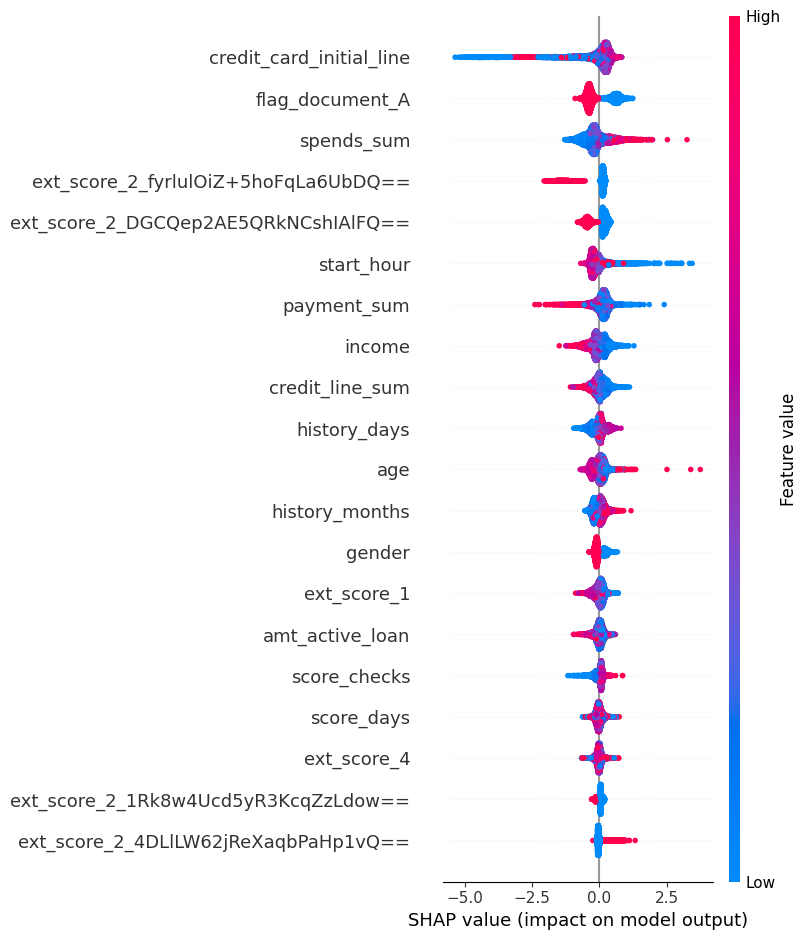

In [30]:
# Usar TreeExplainer diretamente (mais estável com XGBoost)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_float)

# Plot dos valores SHAP
shap.summary_plot(shap_values, X_test)

- credit_card_initial_line: Limites mais baixos tendem a aumentar o risco.
- spends_sum: impacta significamente no modelo
- flag_document_A: A ausência ou presença desse documento impacta significativamente o risco.
- Scores externos (ext_score_2_...):
- Scores baixos (azul) → aumentam a probabilidade de inadimplência (impacto SHAP positivo).
- Scores altos (vermelho) → reduzem risco.
- Variáveis de gastos (spends_max, spends_sum, etc.): Comportamentos de consumo influenciam moderadamente o risco.
- start_hour, date_nunique, income, age, gender: Têm impacto menor, mas ainda presentes.

____________________________________________________________________________________________________________________________________________________________________________________________

### Insigths:

Alta performance preditiva
- O XGBoost demonstrou excelente capacidade de distinguir entre clientes adimplentes e inadimplentes, com uma matriz de confusão favorável e uma significativa redução nas perdas financeiras comparado a cenários alternativos.

Aprendizado de padrões complexos
- O modelo conseguiu capturar relações não-lineares e interações entre variáveis que regras manuais ou modelos mais simples não detectam. Isso foi essencial para aprovar bons clientes que teriam sido negados pelas regras tradicionais.

Robustez e estabilidade
- O XGBoost se mostrou estável frente a diferentes subconjuntos de dados, mantendo boa generalização. A baixa taxa de falsos positivos (inadimplentes aprovados) contribuiu diretamente para o lucro simulado.

Capacidade de explicabilidade com SHAP
- O uso de ferramentas como SHAP values permitiu interpretar as decisões do modelo, garantindo transparência no processo de decisão de crédito — o que é vital em aplicações reais e reguladas.

Escalabilidade e produção
- O XGBoost é leve e eficiente, com tempos rápidos de inferência. Isso facilita sua integração em pipelines de decisão em tempo real, ideal para cenários de análise de crédito online.

# Modelo atual